# No dimensionality reduction - Flux ANN
- This notebook will explore different architectures and hyperparameters of the **Artificial Neural Network** using **Flux**, looking for an optimal configuration. In this case, the Dataset **without dimensionality reduction** will be used. In other words, all the features of the original dataset are going to be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Nunez Sánchez, Fernando 

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
using Statistics
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed = 42
Random.seed!(seed)

TaskLocalRNG()

In [12]:
using HDF5;
using Preprocessing;
using ModelSelection;
using Plotting;
using ANN_Modeling;
using Sk_Modeling;

In [3]:
using Flux

## Loading data
- The only preprocessing applied to the data was a Min-Max normalization.

In [4]:
file = h5open("ndr_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [5]:
model = :ANN
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = [];

In [6]:

hyperparameters = [
    Dict("architecture" => [32], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [32, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 64], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 128], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
# Now with relu same topologies
    Dict("architecture" => [32], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [32, 32], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 128], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),

]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10
Training with set of hyperparameters 11
Training with set of hyperparameters 12
Training with set of hyperparameters 13
Training with set of hyperparameters 14
Training with set of hyperparameters 15
Training with set of hyperparameters 16

----- acc means -----
Hyperparams set 5 -> 0.991 ± 0.008
Hyperparams set 7 -> 0.988 ± 0.009
Hyperparams set 6 -> 0.988 ± 0.008
Hyperparams set 4 -> 0.987 ± 0.009
Hyperparams set 8 -> 0.985 ± 0.006
Hyperparams set 3 -> 0.985 ± 0.011
Hyperparams set 2 -> 0.985 ± 0.006
Hyperparams set 1 -> 0.981 ± 0.01
Hyperparams set 9 -> 0.976 ± 0.009
Hyperparams set 16 -> 0.976 ± 0.

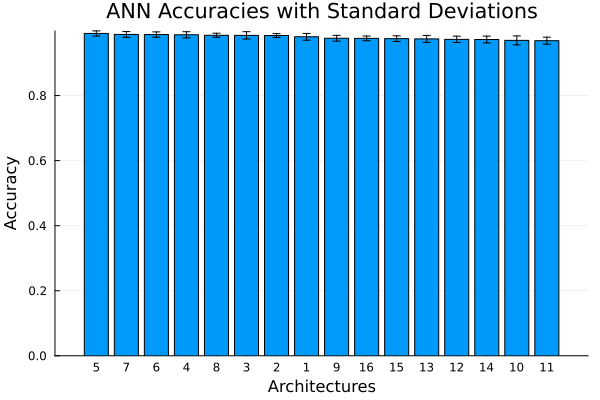

In [7]:
plot_acc_comparison(model, all_metrics)

## Discussion

The artificial neural networks seem to perform quite well in this problem. Additionally, the sigmoid activation function appears to be more effective, as all models using this function lead the ranking (the top 8 models). On the other hand, specifically in the case of using the sigmoid as the activation function, topologies with two hidden layers seem to yield better results, with the `[64, 32] ` topology being the most prevalent. It would be interesting to further explore other two-layer configurations.

In [8]:
hyperparameters = [
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.001, "validation_ratio" => 0.2, "n_iter_no_change" => 20, "max_iter" => 1000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.001, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 20, "max_iter" => 1000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.1, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "minLoss" => 0.0)

]

all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5

----- acc means -----
Hyperparams set 4 -> 0.987 ± 0.007
Hyperparams set 3 -> 0.986 ± 0.008
Hyperparams set 2 -> 0.975 ± 0.01
Hyperparams set 5 -> 0.79 ± 0.133
Hyperparams set 1 -> 0.774 ± 0.115

----- sensitivity means -----
Hyperparams set 4 -> 0.987 ± 0.007
Hyperparams set 3 -> 0.986 ± 0.008
Hyperparams set 2 -> 0.975 ± 0.01
Hyperparams set 5 -> 0.79 ± 0.133
Hyperparams set 1 -> 0.774 ± 0.115

----- specificity means -----
Hyperparams set 4 -> 0.996 ± 0.002
Hyperparams set 3 -> 0.995 ± 0.003
Hyperparams set 2 -> 0.991 ± 0.004
Hyperparams set 5 -> 0.93 ± 0.042
Hyperparams set 1 -> 0.927 ± 0.038

----- ppv means -----
Hyperparams set 4 -> 0.987 ± 0.007
Hyperparams set 3 -> 0.987 ± 0.008
Hyperparams set 2 -> 0.976 ± 0.01
Hyperparams set 5 -> 0.933 ± 0.034
Hyperparams set 1 -> 0.871 ± 0.05

---

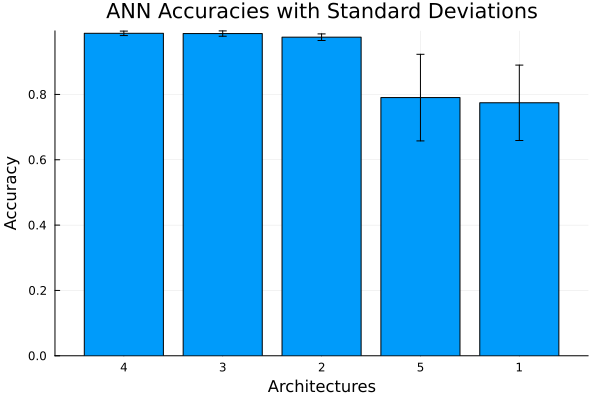

In [9]:
plot_acc_comparison(model, all_metrics)

### Discussion

Once again, very good results are obtained. It appears that better values are achieved with a learning rate of `0.01`, as the poorest performing models were those with either a higher or lower learning rate.

This observation suggests that a learning rate of `0.01` strikes an optimal balance for this particular dataset and ANN configuration. A learning rate that is too high might cause the model to overshoot the optimal solution, while a rate that is too low might result in slower convergence, potentially getting stuck in local minima.


## Final discussion

Finally, as can be seen in the graph below, the results obtained in both experiments are quite close, being both very high accuracies. Nonetheless, the model with a higher accuracy score has been obtained in the first experiment, with the following hyperparameters:

    1. architecture : [64, 32] 
    2. activation : fill(σ, 2) 
    3. learning_rate : 0.01 
    4. validation_ratio : 0.2 
    5. n_iter_no_change : 80 
    6. max_iter : 2000 
    7. repetitionsTraining : 10 
    8. minLoss : 0.0


As can be seen, in order to apply the early stopping technique we have used a 20% of the training data as a validation set. Additionaly, since ANNs are non-deterministic models, we have repeated the experiment 10 times (`repetitionsTraining = 10`), thus getting more reliable evaluations. 

All of this results in an accuracy of **0.991 ± 0.008**.

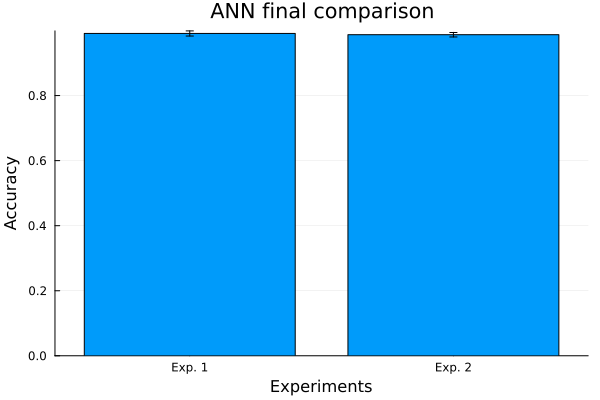

In [11]:
plot_final_comparison("ANN final comparison", best_models_acc)